In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [21]:
df = pd.read_csv('csv/data.csv')

In [22]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


C:\Users\Putchik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Putchik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


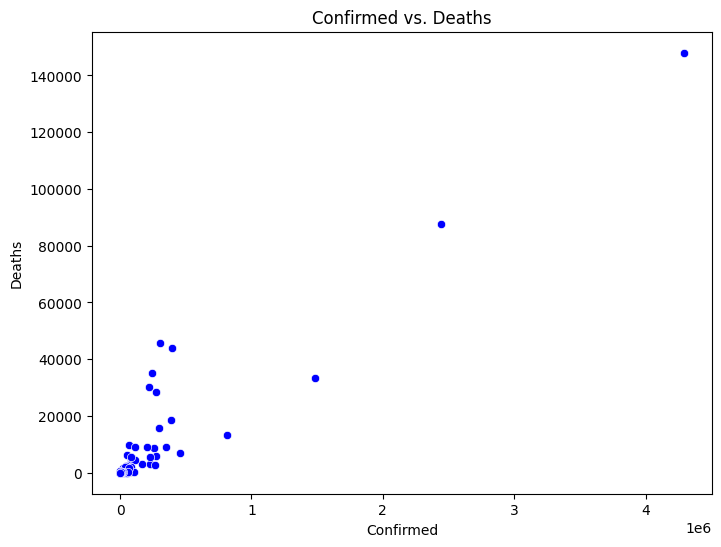

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Confirmed"], y=df["Deaths"], color="blue")
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.title("Confirmed vs. Deaths")
plt.show()

In [42]:
X = df[["Confirmed"]]
y = df["Deaths"] 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
print("Training Set:")
print(X_train)
print(y_train)

print("\nTesting Set:")
print(X_test)
print(y_test)


Training Set:
     Confirmed
95        1219
69          23
109       6208
29        2328
126       9132
..         ...
106       3369
14         110
92       64379
179      21209
102       6321

[149 rows x 1 columns]
95      31
69       0
109    156
29      22
126    255
      ... 
106     15
14       7
92     438
179    121
102    112
Name: Deaths, Length: 149, dtype: int64

Testing Set:
     Confirmed
185       4552
78        1854
55         265
137      45902
161      79395
15       67251
75          12
154     452529
122       3439
175      67096
158       2805
42       15655
165       7235
30         226
51       81161
16       66428
166        509
177     301708
85      246286
19          99
124      41180
118       1843
5           86
148        114
24         141
152       2087
9        20558
138     816680
135      50299
162      34477
18        1770
172     227019
76       39741
66       33624
68          14
35      347923
97         505
145     268934
185      140
78       

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
print(f"Intercept (b): {model.intercept_:.2f}")  # No indexing needed
print(f"Coefficient (m): {model.coef_[0]:.2f}")  # Use [0] to extract number

Intercept (b): 323.47
Coefficient (m): 0.03


In [47]:
Y_pred = model.predict(X_test)

C:\Users\Putchik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Putchik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Putchik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Putchik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

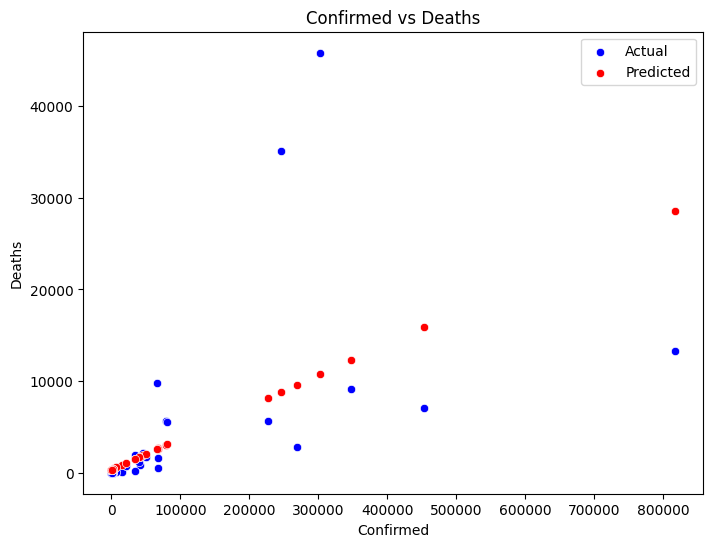

In [54]:
plt.figure(figsize=(8,6))

# Scatter plot of actual salaries
sns.scatterplot(x=X_test.values.flatten(), y=y_test.values.flatten(), color="blue", label="Actual")

# Scatter plot of predicted salaries
sns.scatterplot(x=X_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted")

plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.title("Confirmed vs Deaths")
plt.legend()
plt.show()

In [59]:
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 62426541.10
R² Score: 0.27


In [62]:
Death_Variance = np.var(y_test)
print(f"Death Variance: {Death_Variance:.2f}")

Death Variance: 85741421.17
